In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
# Wczytanie danych z pliku CSV
df = pd.read_csv("olx_mieszkania.csv")
df

,link1,link2,Tytuł,Cena,Lokalizacja,wielkosc
0,https://www.olx.pl/nieruchomosci/mieszkania/sp...,/d/oferta/mieszkanie-2-pokojowe-CID3-IDMFrhY.html,Mieszkanie 2-pokojowe,460 000 złdo negocjacji,Koszalin - 09 kwietnia 2024,43 m² - 10697.67 zł/m²
1,https://www.olx.pl/nieruchomosci/mieszkania/sp...,/d/oferta/mieszkanie-36-m2-dwa-pokoje-czuby-CI...,Mieszkanie 36 m2 dwa pokoje Czuby,434 900 złdo negocjacji,Lublin - Odświeżono dnia 09 kwietnia 2024,"36,10 m² - 12047.09 zł/m²"
2,https://www.olx.pl/nieruchomosci/mieszkania/sp...,https://www.otodom.pl/pl/oferta/bialoleka-2pok...,Białołęka 2pok+kuchnia+Ogródek z 2015r Do Wejś...,695 000 zł,"Warszawa, Białołęka - Odświeżono dnia 09 kwiet...",47 m² - 14787.23 zł/m²
3,https://www.olx.pl/nieruchomosci/mieszkania/sp...,/d/oferta/mieszkanie-2-pokojowe-w-bloku-CID3-I...,Mieszkanie 2-pokojowe w bloku,195 000 zł,Kamienna Góra - Dzisiaj o 05:29,38 m² - 5131.58 zł/m²
4,https://www.olx.pl/nieruchomosci/mieszkania/sp...,/d/oferta/m3-os-sloneczne-CID3-IDLNXcW.html,M3 os. Słoneczne,420 000 zł,Chełm - Dzisiaj o 05:29,60 m² - 7000 zł/m²
...,...,...,...,...,...,...
2593,https://www.olx.pl/nieruchomosci/domy/sprzedaz/,https://www.otodom.pl/pl/oferta/ostatnie-domy-...,Ostatnie domy | Gotowe do wykończenia | Blisko...,860 000 zł,Wielka Wieś - Odświeżono dnia 09 kwietnia 2024,110 m² - 7818.18 zł/m²
2594,https://www.olx.pl/nieruchomosci/domy/sprzedaz/,https://www.otodom.pl/pl/oferta/nowa-inwestycj...,Nowa inwestycja | 4 pokoje | pompa ciepła,899 000 zł,Konstancin-Jeziorna - 09 kwietnia 2024,"126,90 m² - 7084.32 zł/m²"
2595,https://www.olx.pl/nieruchomosci/domy/sprzedaz/,https://www.otodom.pl/pl/oferta/wolno-stojacy-...,Wolno-stojący dom w sercu Pogodna,2 490 000 zł,"Szczecin, Pogodno - Odświeżono dnia 09 kwietni...",338 m² - 7366.86 zł/m²
2596,https://www.olx.pl/nieruchomosci/domy/sprzedaz/,https://www.otodom.pl/pl/oferta/moj-dom-w-glos...,Mój dom w Głoskowie | 5 pokoi | cicha okolica,1 129 000 zł,Głosków - 09 kwietnia 2024,"175,50 m² - 6433.05 zł/m²"


In [36]:
# Przetwarzanie danych
df['cena_num'] = pd.to_numeric(df['Cena'].str.replace(' zł', '').str.replace(' ', ''), errors='coerce')
print(df['wielkosc'].unique())
# Rozdzielenie danych na powierzchnię i cenę za metr kwadratowy
df[['powierzchnia_m2', 'cena_zl_m2']] = df['wielkosc'].str.split(' - ', expand=True)

# Usunięcie jednostek powierzchni
df['powierzchnia_m2'] = df['powierzchnia_m2'].str.replace(' m²', '')
# Usunięcie spacji z danych
df['powierzchnia_m2'] = df['powierzchnia_m2'].str.replace(' ', '')

# Konwersja danych na liczby zmiennoprzecinkowe
df['powierzchnia_m2'] = df['powierzchnia_m2'].str.replace(',', '.').astype(float)
df['cena_zl_m2'] = df['cena_zl_m2'].str.replace(' zł/m²', '').str.replace(' ', '').str.replace(',', '.').astype(float)

# # Podzielienie kolumny 'Lokalizacja' na dwie osobne kolumny: 'Miejscowość' i 'Data Update'
# split_location = df['Lokalizacja'].str.split(' - ', expand=True)

# # Sprawdzenie, czy wyniki podziału mają taką samą długość
# if len(split_location.columns) == 2:
#     df[['Miejscowość', 'Data Update']] = split_location
# else:
#     # Jeśli wyniki podziału mają inną długość, przypisz NaN do kolumn 'Miejscowość' i 'Data Update'
#     df['Miejscowość'] = np.nan
#     df['Data Update'] = np.nan

# # Sprawdzenie typu danych w kolumnie 'Miejscowość'
# print(df['Miejscowość'].dtype)

# # Jeśli kolumna 'Miejscowość' zawiera wartości NaN, konwertujemy ją do typu string
# df['Miejscowość'] = df['Miejscowość'].astype(str)

# # Oczyść nazwy miejscowości z dodatkowych białych znaków
# df['Miejscowość'] = df['Miejscowość'].str.strip()

# # Oczyść datę update oferty z dodatkowych białych znaków
# df['Data Update'] = df['Data Update'].astype(str)
# df['Data Update'] = df['Data Update'].str.strip()

df.to_csv('oczyszczony_olx.csv')



['43 m² - 10697.67 zł/m²' '36,10 m² - 12047.09 zł/m²'
 '47 m² - 14787.23 zł/m²' ... '338 m² - 7366.86 zł/m²'
 '175,50 m² - 6433.05 zł/m²' '255 m² - 5019.6 zł/m²']


In [37]:
# Obliczanie średniej ceny za metr kwadratowy
srednia_cena_m2 = df['cena_zl_m2'].mean()
srednia_cena_m2

8496.710919938414

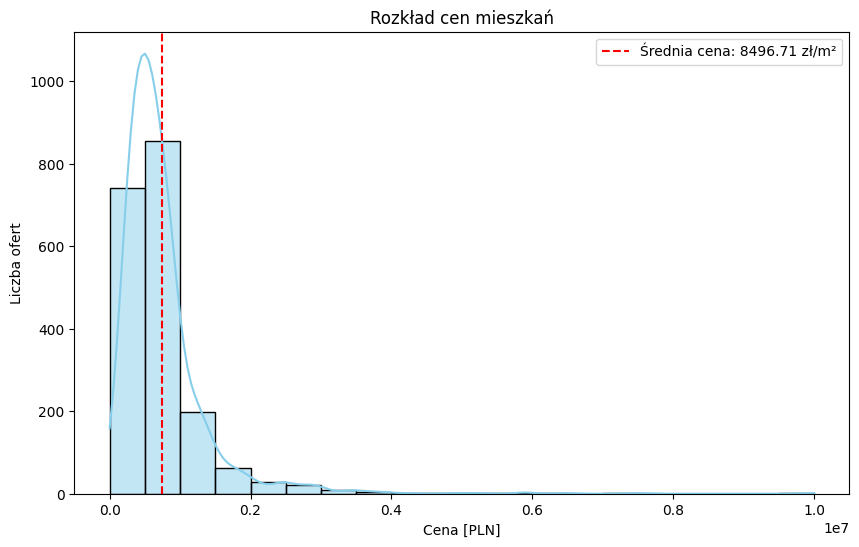

In [38]:
# Wykres
plt.figure(figsize=(10, 6))
sns.histplot(df['cena_num'], bins=20, kde=True, color='skyblue')
plt.title('Rozkład cen mieszkań')
plt.xlabel('Cena [PLN]')
plt.ylabel('Liczba ofert')
plt.axvline(df['cena_num'].mean(), color='red', linestyle='--', label=f'Średnia cena: {srednia_cena_m2:.2f} zł/m²')
plt.legend()
plt.show()

In [39]:
# Obliczenie liczby wystąpień każdej lokalizacji
locations_count = df['Lokalizacja'].value_counts()

# Obliczenie średniej ceny dla każdej lokalizacji
mean_prices_by_location = df.groupby('Lokalizacja')['cena_num'].mean()

# Stworzenie nowego DataFrame z wynikami
locations_data = pd.DataFrame({
    'Liczba ofert': locations_count,
    'Średnia cena': mean_prices_by_location
})

# Wyświetlenie wyników posortowanych malejąco według liczby ofert
locations_data_sorted = locations_data.sort_values(by='Liczba ofert', ascending=False)
print(locations_data_sorted)
locations_data_sorted.to_csv('location.csv')

                                                    Liczba ofert  Średnia cena
Lokalizacja                                                                   
Bydgoszcz - 09 kwietnia 2024                                  39  5.155350e+05
Lublin - 09 kwietnia 2024                                     24  7.449295e+05
Warszawa, Białołęka - 09 kwietnia 2024                        14  8.791266e+05
Toruń - 09 kwietnia 2024                                      12  7.597182e+05
Warszawa, Mokotów - 09 kwietnia 2024                          12  1.072667e+06
...                                                          ...           ...
Kraków, Nowa Huta - Odświeżono dnia 08 kwietnia...             1  5.400000e+05
Kraków, Nowa Huta - 07 kwietnia 2024                           1           NaN
Kraków, Mistrzejowice - 09 kwietnia 2024                       1  8.990000e+05
Kraków, Krowodrza - Odświeżono dnia 06 kwietnia...             1  1.225000e+06
Żółwin - 09 kwietnia 2024                           

In [40]:
#work in progres
import geopandas as gpd
import matplotlib.pyplot as plt

# Wczytanie pliku z danymi przestrzennymi Polski
poland_map = gpd.read_file('Poland_shapefile/pl_1km.shp')

# Połączenie danych o lokalizacjach z danymi przestrzennymi Polski
merged_data = poland_map.merge(locations_data, how='left', left_on='nazwa_lokalizacji', right_on='Lokalizacja')

# Rysowanie mapy
fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')
merged_data.plot(column='Średnia cena', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.show()


DriverError: Poland_shapefile/pl_1km.shp: No such file or directory